# 自然言語と単語の分散表現

## 自然言語とは

### 単語の意味

コンピュータに「単語の意味」を理解させるには、つまり「単語の意味」をコンピュータ上でうまく表現する方法について3つ手段を考える. 

1. シソーラス（類語辞典）による手法
2. カウントペースの手法
3. 推論ベースの手法

## シソーラス

自然言語処理におけるシソーラスは単に類語辞典にとどまらない. 一般には単語間における「上位と下位」、「全体と部分」といった関係性についても表現がされている. 具体的にはグラフ構造によって単語の関係を管理している. 

### WordNet

最も有名なシソーラスはWordNetである. 

### シソーラスの問題点

1. 時代の変化に対応するのが困難
2. 人のコストが高い
3. 単語の細かなニュアンスを表現できない

## カウントベースの手法

カウントベース手法で分析を行うには「コーパス」が必要である。コーパスとは、アプリケーションを想定して目的を持って収集されたテキストデータである。テキストデータには目的に関する人間の知恵が反映されていると考えられるため、エッセンスを抽出できれば有用となる. 

### Pythonによるコーパスの下準備

自然言語処理で用いられるコーパスにはさまざまなものが存在します。例えばWikipedia, Google Newsです. 夏目漱石やシェークスピアといった偉大な作家の作品についてもコーパスとして利用されている.


In [1]:
# 1文しかないがコーパスをつくる
text = "You say goodbye and I say hello."

In [2]:
# コーパスに対する前処理
text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [3]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

単語をテキストのまま操作するのは不便であるので、単語にＩＤを振って、ＩＤのリストとして処理が進められるように前処理を行う. 

In [4]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [5]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [6]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [7]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [1]:
# コーパス処理を関数化したpreprocessを使う
import numpy as np
from pynet.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_int, id_to_word = preprocess(text)


In [3]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [4]:
word_to_int

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [5]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

### 単語の分散表現

色は「コバルトブルー」という名前が付いているが、ＲＧＢという3変数の値で表現することもできる。これは同じ色を別の単語で表現するしている場合にも判断がしやすく、知らない単語で表現された場合においてもどのような色であるのかを判断することが可能である. 

自然言語処理の単語でも同様にベクトルを用いた表現が可能ではないのか？我々が目指しているのは単語の意味を的確に捉えたベクトル表現である。これは自然言語処理の分野では、単語の**分散表現**と呼ばれている. 

### 分布仮説

> 単語の意味は、周囲の単語によって形成される

これから先、「コンテキスト」と表現した場合にはある単語の周囲にある単語を指すとする。そしてある単語からどの程度離れている単語までを見るのかを「ウィンドウサイズ」と表現する。例えば「you say goodbye and i sa hello.」のgoodbyeのウィンドウサイズ1のコンテキストはsay, andの2つである. 

### 共起行列

分布仮説に基づいて単語をベクトルで表現する方法として、周囲の単語を「カウント」することを考える。

In [6]:
import numpy as np
from pynet.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_int, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


上の結果より、ここでは語彙数が全部で7個あることがわかる。

それぞれの単語についてコンテキストに含まれる単語の頻度を数えていく. つまり、注目の単語x(コンテキスト)でクロステーブルを作成する。

In [7]:
# 数えた結果
# ex) 2行目はsayであり, you, goodbye列にカウントがされている
C = np.array([
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 1, 1, 0],
[0, 1, 0, 1, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 1, 0],
], dtype=np.int32)

### ベクトル間の類似度

一般には**コサイン類似度**が用いられる. 

$$
    \textrm{similarity}(x,y)=\frac{x\cdot y}{\|x\|\|y\|} 
$$

In [1]:
import numpy as np
from pynet.util import preprocess, create_co_matrix, cos_similarity

In [2]:
text ='You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


In [3]:
print(c0)

[0 1 0 0 0 0 0]


In [4]:
print(c1
     )

[0 1 0 1 0 0 0]


### 類似単語のランキングの表示

In [10]:
a = np.random.randn(5)
a

array([ 0.88788657,  1.10435083, -1.20129306, -0.60136768, -0.8138001 ])

In [11]:
# 値が小さい順の要素インデックス
a.argsort()

array([2, 4, 3, 0, 1], dtype=int64)

In [12]:
a.sort()
print(a)

[-1.20129306 -0.8138001  -0.60136768  0.88788657  1.10435083]


In [13]:
a.argsort()

array([0, 1, 2, 3, 4], dtype=int64)

In [2]:
import numpy as np
from pynet.util import preprocess, create_co_matrix, cos_similarity, most_similar


In [3]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


## カウントベースの手法の改善

### 相互情報量

純粋なカウントベースは、無意味な情報も取得してしまう。例えばThe Carという単語が出てきた場合に、Theがよく用いられるばかりにTheとCarの関連性が大きいという意味のない結果となってしまう. そこで**相互情報量**という指標を用いる. 

式を見ると単独での出現率が低い単語で、共起した場合には値が大きくなるようだ. 


$$
\textrm{PMI(x,y)} =\log_2\frac{P(x,y)}{P(x)P(y)} 
$$

一般に$P(x,y)$はゼロになり得るため$\textrm{PPMI} = \textrm{max}\{\textrm{PMI}(x,y),0\}$として置く. 

In [1]:
import numpy as np
from pynet.util import preprocess, create_co_matrix, cos_similarity, most_similar, ppmi


In [3]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)
np.set_printoptions(precision=3) # 有効桁3桁で表示
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


### 次元削除

上の例ではほとんどの要素がゼロである。これらはノイズとなり、重要な情報を見失う結果となる. そこで次元削除という考え方がある. つまり固有値分解や特異値分析をおこなっていく. 

$$
X = USV^{T}
$$

$U$は直行行列であり、列空間を表現している。そして$S$には列ベクトルの重要度を表現する特異値が入力されている. 特異値に一定の閾値を設けることで、重要な列ベクトルだけを抽出することが可能となる. 


### SVDによる次元削除

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynet.util import preprocess, create_co_matrix, ppmi

In [4]:
text = 'You say goodbye and I say hello.abs'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, windows_size = 1)
W = ppmi(C)

In [5]:
# SVD decomposition
U, S, V = np.linalg.svd(W)

In [8]:
print(
    C[0], # 共起行列
    W[0], # PPMI行列
    U[0], # SVD
)

[0 1 0 0 0 0 0] [0.        1.8073549 0.        0.        0.        0.        0.       ] [-3.4094876e-01 -1.1102230e-16 -3.8857806e-16 -1.2051624e-01
  0.0000000e+00  9.3232495e-01  2.2259700e-16]


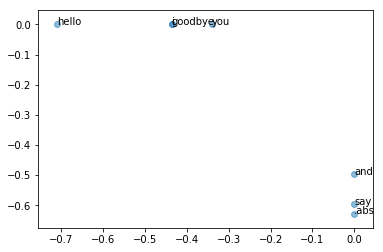

In [9]:
# 2次元のベクトルに削減してからグラフプロットする. 
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:,0], U[:,1], alpha = .5)
plt.show()

一般にＳＶＤはデータサイズNの３乗に比例するため自然言語処理では破綻しやすい。そこで、打ち切りSVDという小さな特異値を無視することで高速化を実現した手法がとられる. 

### PTBデータセット

本格的なコーパスを利用する. PTBは自然言語処理のベンチマークとしてよく利用される. 


In [1]:
import sys
sys.path.append("deep-learning-from-scratch-2")
from dataset import ptb

In [2]:
corpus, word_to_id, id_to_word = ptb.load_data("train")

In [3]:
print('corpus size:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


### PTBデータセットでの評価

In [6]:
import sys
sys.path.append("deep-learning-from-scratch-2")
import numpy as np
import matplotlib.pyplot as plt
from pynet.util import preprocess, create_co_matrix, ppmi, most_similar
from dataset import ptb

In [3]:
window_size = 2
wordvec_size = 100

In [9]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('counting co-occurrence ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('calculating PPMI ...')
W = ppmi(C, verbose = True)

print ('calculating SVD ...abs')
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(
        W, 
        n_components = wordvec_size, 
        n_iter = 5,
        random_state=None)
except ImportError:
    U, S, V = np.linalg.svd(W)


counting co-occurrence ...
calculating PPMI ...


C:\Users\shinya\Dropbox\Python\W\DeepLearningScratch2\pynet\util.py:91: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i,j] * N / (S[j] * S[i]) + eps)
C:\Users\shinya\Dropbox\Python\W\DeepLearningScratch2\pynet\util.py:91: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i,j] * N / (S[j] * S[i]) + eps)


1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0% done
89.0% done
90.0% done
91.0% done
92.0% do

In [11]:
word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_wod, word_vecs, top = 5)


[query] you
 i: 0.6435355544090271
 we: 0.5660431385040283
 do: 0.5437111854553223
 anybody: 0.5300085544586182
 if: 0.47720038890838623

[query] year
 month: 0.6472570896148682
 quarter: 0.6443499326705933
 last: 0.6038984060287476
 earlier: 0.584826648235321
 next: 0.5673558712005615

[query] car
 auto: 0.619389533996582
 luxury: 0.5517598986625671
 vehicle: 0.5475897789001465
 cars: 0.5011576414108276
 corsica: 0.44716912508010864

[query] toyota
 motor: 0.7545796632766724
 nissan: 0.6819114685058594
 motors: 0.6336272954940796
 honda: 0.6123921871185303
 mazda: 0.5970044136047363


納得いく類型化ができているように見える. 